# ***Bengaluru Housing***

---

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [ ]:
path = '/content/drive/MyDrive/ColabData/housing/Bengaluru_House_Data.csv'
housing = pd.read_csv(path)

# ***Quick look at the data structure***


---



In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [ ]:
housing.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
housing.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


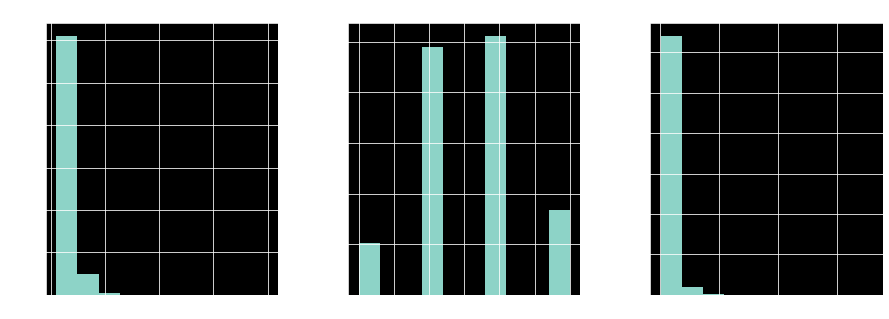

In [ ]:
housing.hist(figsize=(15,5), layout=(1,3))
plt.show()

# ***Preparing the Data***
---

In [ ]:
housing_num = housing.drop(columns=['availability', 'society'])
housing_num.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [ ]:
housing_num.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

## **Missing Attributes**
---

In [ ]:
housing_num.isnull().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [ ]:
housing_num.dropna(subset=['location', 'size'], inplace=True)
housing_num.isnull().sum()

area_type       0
location        0
size            0
total_sqft      0
bath           57
balcony       593
price           0
dtype: int64

In [ ]:
bath_median = housing_num['bath'].median()
housing_num['bath'].fillna(bath_median, inplace=True)
housing_num['balcony'].fillna(0, inplace=True)
housing_num.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

## **Text Attributes**
---

In [ ]:
housing_num.head(3)

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00


### **BHK Attribute**


In [ ]:
housing_num['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [ ]:
housing_num['bhk'] = housing_num['size'].apply(lambda x: int(x.split(' ')[0]))
housing_num.drop(columns='size', inplace=True)
housing_num.head(3)

,area_type,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,3


### **Area Attribute**

In [ ]:
housing_num.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

housing_num[~housing_num['total_sqft'].apply(is_float)].head(10)

,area_type,location,total_sqft,bath,balcony,price,bhk
30,Super built-up Area,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
56,Built-up Area,Devanahalli,3010 - 3410,2.0,0.0,192.000,4
81,Built-up Area,Hennur Road,2957 - 3450,2.0,0.0,224.500,4
122,Super built-up Area,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,KR Puram,1015 - 1540,2.0,0.0,56.800,2
224,Super built-up Area,Devanahalli,1520 - 1740,2.0,0.0,74.820,3
410,Super built-up Area,Kengeri,34.46Sq. Meter,1.0,0.0,18.500,1
549,Super built-up Area,Hennur Road,1195 - 1440,2.0,0.0,63.770,2


In [ ]:
def conv_sqft_to_num(x):
    tokens = x.split(' - ')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))//2
    try:
        return float(x)
    except:
        return None

housing_num['total_sqft'] = housing_num['total_sqft'].apply(conv_sqft_to_num)
housing_num.dropna(inplace=True)

In [ ]:
housing_num.head(3)

,area_type,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3


### **Location Attirbute**

In [ ]:
print(len(housing_num.location.unique()))
housing_num.location.unique()

1298


array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [ ]:
housing_num.location = housing_num.location.apply(lambda x: x.strip())
loc_stats = housing_num.groupby('location')['location'].agg('count').sort_values(ascending=False)
loc_stats

location
Whitefield              538
Sarjapur  Road          397
Electronic City         304
Kanakpura Road          271
Thanisandra             236
                       ... 
Kumbhena Agrahara         1
Kudlu Village,            1
Konappana Agrahara        1
Kodanda Reddy Layout      1
1 Annasandrapalya         1
Name: location, Length: 1287, dtype: int64

In [ ]:
loc_stats_20 = loc_stats[loc_stats<=20]
len(loc_stats_20)

1143

In [ ]:
housing_num.location = housing_num.location.apply(lambda x: 'other' if x in loc_stats_20 else x)
len(housing_num.location.unique())

145

In [ ]:
housing_num.head(3)

,area_type,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Plot Area,other,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3


# ***Feature Engineering***
---

In [ ]:
housing_num['price_per_bhk'] = housing_num['price']/housing_num['bhk']
housing_num['price_per_sqft'] = housing_num['price']*1000/housing_num['total_sqft']

In [ ]:
corr_matrix = housing_num.corr()
corr_matrix['price'].sort_values(ascending=False)

price             1.000000
price_per_bhk     0.893217
total_sqft        0.575633
bath              0.454334
bhk               0.397963
price_per_sqft    0.028373
balcony           0.019501
Name: price, dtype: float64

In [ ]:
from pandas.plotting import scatter_matrix

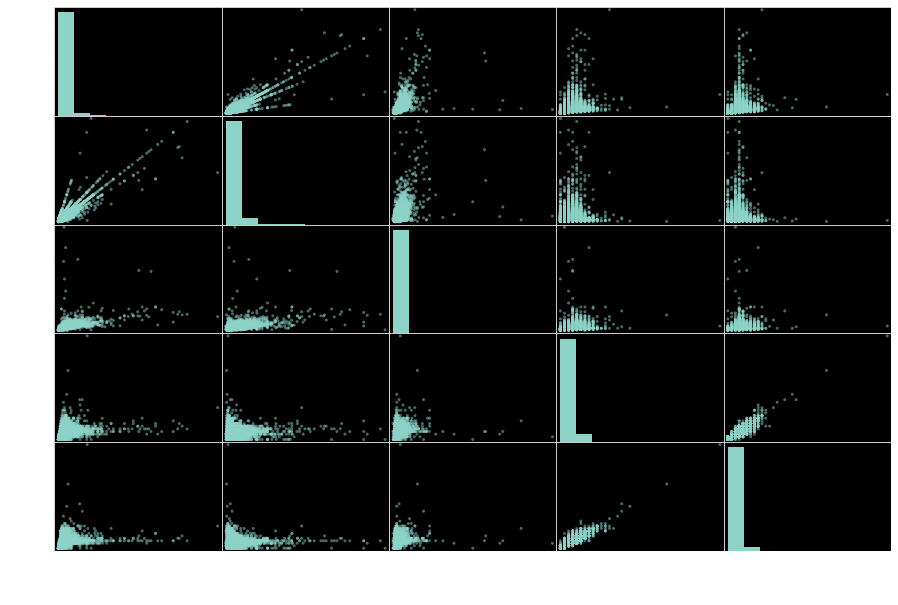

In [ ]:
attributes = ['price', 'price_per_bhk', 'total_sqft', 'bath', 'bhk']
scatter_matrix(housing_num[attributes], figsize=(15,10))
plt.show()

# ***Outlier Removal***
---


# ***Text to Numeric Data***
---

In [ ]:
housing_num.head(3)

,area_type,location,total_sqft,bath,balcony,price,bhk,price_per_bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,19.535000,36.998106
1,Plot Area,other,2600.0,5.0,3.0,120.00,4,30.000000,46.153846
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3,20.666667,43.055556


In [ ]:
dummies1 = pd.get_dummies(housing_num.location)
dummies2 = pd.get_dummies(housing.area_type)

In [ ]:
dummies1.head()

,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Ardendale,Attibele,BTM 2nd Stage,Babusapalaya,Balagere,Banashankari,Banashankari Stage III,Bannerghatta Road,Basavangudi,Basaveshwara Nagar,Battarahalli,Begur Road,Bellandur,Bhoganhalli,Binny Pete,Bisuvanahalli,Bommanahalli,Bommasandra,Bommasandra Industrial Area,Brookefield,Budigere,CV Raman Nagar,Chandapura,Channasandra,Chikkalasandra,...,Margondanahalli,Munnekollal,Mysore Road,Nagarbhavi,Old Airport Road,Old Madras Road,Padmanabhanagar,Panathur,R.T. Nagar,Rachenahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Ramagondanahalli,Ramamurthy Nagar,Rayasandra,Sahakara Nagar,Sarjapur,Sarjapur Road,Seegehalli,Singasandra,Somasundara Palya,Sonnenahalli,Subramanyapura,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
dummies2.head()

,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,0,0,0,1
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [ ]:
housing_new = pd.concat([housing_num, dummies1.drop(columns='other'), dummies2], axis='columns')
housing_new.drop(columns=['area_type', 'location'], inplace=True)

In [ ]:
housing_new.head()

,total_sqft,bath,balcony,price,bhk,price_per_bhk,price_per_sqft,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Ardendale,Attibele,BTM 2nd Stage,Babusapalaya,Balagere,Banashankari,Banashankari Stage III,Bannerghatta Road,Basavangudi,Basaveshwara Nagar,Battarahalli,Begur Road,Bellandur,Bhoganhalli,Binny Pete,Bisuvanahalli,Bommanahalli,Bommasandra,...,Nagarbhavi,Old Airport Road,Old Madras Road,Padmanabhanagar,Panathur,R.T. Nagar,Rachenahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Ramagondanahalli,Ramamurthy Nagar,Rayasandra,Sahakara Nagar,Sarjapur,Sarjapur Road,Seegehalli,Singasandra,Somasundara Palya,Sonnenahalli,Subramanyapura,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,1056.0,2.0,1.0,39.07,2.0,19.535000,36.998106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1
1,2600.0,5.0,3.0,120.00,4.0,30.000000,46.153846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
2,1440.0,2.0,3.0,62.00,3.0,20.666667,43.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
3,1521.0,3.0,1.0,95.00,3.0,31.666667,62.458909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1
4,1200.0,2.0,1.0,51.00,2.0,25.500000,42.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1


In [ ]:
housing_new.describe()

,total_sqft,bath,balcony,price,bhk,price_per_bhk,price_per_sqft,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Ardendale,Attibele,BTM 2nd Stage,Babusapalaya,Balagere,Banashankari,Banashankari Stage III,Bannerghatta Road,Basavangudi,Basaveshwara Nagar,Battarahalli,Begur Road,Bellandur,Bhoganhalli,Binny Pete,Bisuvanahalli,Bommanahalli,Bommasandra,...,Nagarbhavi,Old Airport Road,Old Madras Road,Padmanabhanagar,Panathur,R.T. Nagar,Rachenahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Ramagondanahalli,Ramamurthy Nagar,Rayasandra,Sahakara Nagar,Sarjapur,Sarjapur Road,Seegehalli,Singasandra,Somasundara Palya,Sonnenahalli,Subramanyapura,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,Built-up Area,Carpet Area,Plot Area,Super built-up Area
count,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,...,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,13257.00000,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,13257.00000,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,13320.000000,13320.000000,13320.000000,13320.000000
mean,1558.805925,2.688165,1.515200,112.471981,2.802670,37.982097,79.128374,0.001810,0.001810,0.002942,0.001735,0.011164,0.004300,0.003244,0.001810,0.004677,0.002037,0.002338,0.001810,0.002037,0.002263,0.002716,0.001810,0.003168,0.002188,0.001886,0.003394,0.005582,0.002037,0.011390,0.002414,0.001584,0.001810,0.006336,0.007241,0.003772,0.001584,0.003847,0.002640,0.002791,...,0.004752,0.002489,0.005356,0.002112,0.003847,0.002716,0.004375,0.012899,0.008071,0.003772,0.005431,0.001660,0.002942,0.00611,0.029946,0.001886,0.002037,0.002112,0.001660,0.003244,0.004526,0.003017,0.017802,0.004677,0.001660,0.002489,0.001584,0.01403,0.005280,0.003244,0.003168,0.003244,0.040582,0.015992,0.003017,0.006412,0.181532,0.006532,0.152027,0.659910
std,1238.478244,1.336799,0.862673,149.092716,1.292117,36.372534,1064.976000,0.042511,0.042511,0.054161,0.041618,0.105072,0.065433,0.056862,0.042511,0.068229,0.045085,0.048302,0.042511,0.045085,0.047518,0.052042,0.042511,0.056199,0.046722,0.043386,0.058165,0.074506,0.045085,0.106119,0.049073,0.039770,0.042511,0.079351,0.084791,0.061300,0.039770,0.061907,0.051316,0.052758,...,0.068775,0.049832,0.072989,0.045911,0.061907,0.052042,0.066002,0.112842,0.089480,0.061300,0.073498,0.040705,0.054161,0.07793,0.170446,0.043386,0.045085,0.045911,0.040705,0.056862,0.067125,0.054849,0.132236,0.068229,0.040705,0.049832,0.039770,0.11762,0.072476,0.056862,0.056199,0.056862,0.197328,0.125447,0.054849,0.079819,0.385472,0.080557,0.359061,0.473757
min,1.000000,1.000000,0.000000,8.000000,1.000000,4.000000,2.678298,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

# ***Test Train Splitting***
---

In [ ]:
X = housing_new.drop(columns=['price', 'price_per_sqft'])
y = housing_new['price'].copy()

X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'train : {len(X_train)}\ntest : {len(X_test)}')

train : 10656
test : 2664


# ***Model Training***
---

In [ ]:
from sklearn.linear_model import LinearRegression
lr_housing = LinearRegression()
lr_housing.fit(X_train, y_train)
lr_housing.score(X_test, y_test)

0.8870824661807201

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.88708247, 0.85636742, 0.89824614, 0.91188921, 0.88532805])